In [2]:
import pandas as pd
from anytree import Node
import matplotlib.pyplot as plt

In [3]:
investment_alternatives = [
    "Stock Market", 
    "Professional Soccer Club",
    "Stock Market / Soccer Club (50/50)",
    "Savings Account"
]

In [4]:
strong_economy = []
weak_economy = []

strong_economy = ([100000, 60000, 80000, 35000])
weak_economy = ([-120000, -20000, -70000, 35000])

In [5]:
payoff_table = pd.DataFrame({
    'Investment Alternatives': investment_alternatives,
    'Strong Economy': strong_economy,
    'Weak Economy': weak_economy
})
print(payoff_table)

              Investment Alternatives  Strong Economy  Weak Economy
0                        Stock Market          100000       -120000
1            Professional Soccer Club           60000        -20000
2  Stock Market / Soccer Club (50/50)           80000        -70000
3                     Savings Account           35000         35000


In [7]:
maximax = payoff_table.copy()
maximax['Maximax'] = \
payoff_table[['Strong Economy', 'Weak Economy']].max(axis = 1)
print(maximax)

highest_payoff = maximax['Maximax'].max()
print("Highest Payoff:", highest_payoff)

              Investment Alternatives  Strong Economy  Weak Economy  Maximax
0                        Stock Market          100000       -120000   100000
1            Professional Soccer Club           60000        -20000    60000
2  Stock Market / Soccer Club (50/50)           80000        -70000    80000
3                     Savings Account           35000         35000    35000
Highest Payoff: 100000


In [8]:
maximin = payoff_table.copy()
maximin['Maximin'] = \
    payoff_table[['Strong Economy', 'Weak Economy']].min(axis = 1)
print(maximin)
highest_payoff = maximin['Maximin'].max()
print("Highest Payoff:", highest_payoff)

              Investment Alternatives  Strong Economy  Weak Economy  Maximin
0                        Stock Market          100000       -120000  -120000
1            Professional Soccer Club           60000        -20000   -20000
2  Stock Market / Soccer Club (50/50)           80000        -70000   -70000
3                     Savings Account           35000         35000    35000
Highest Payoff: 35000


In [9]:
regret = payoff_table.copy()
max_strong = regret['Strong Economy'].max()
max_weak = regret['Weak Economy'].max()
regret['Strong'] = max_strong - regret['Strong Economy']
regret['Weak'] = max_weak - regret['Weak Economy']
print(regret[['Strong', 'Weak']])

   Strong    Weak
0       0  155000
1   40000   55000
2   20000  105000
3   65000       0


In [10]:
regret['Maximum'] = regret[['Strong', 'Weak']].max(axis = 1)
print(regret[['Strong', 'Weak', 'Maximum']])

   Strong    Weak  Maximum
0       0  155000   155000
1   40000   55000    55000
2   20000  105000   105000
3   65000       0    65000


In [11]:
min_max_regret = regret['Maximum'].min()
print(min_max_regret)

55000


In [12]:
strong_econ = 0.75
weak_econ = 0.25

if strong_econ + weak_econ != 1:
    raise ValueError('The probabilities must sum to 1.')
payoff_table['EV'] = \
    (payoff_table['Strong Economy'] * strong_econ) + \
    (payoff_table['Weak Economy'] * weak_econ)
print(payoff_table)

              Investment Alternatives  Strong Economy  Weak Economy       EV
0                        Stock Market          100000       -120000  45000.0
1            Professional Soccer Club           60000        -20000  40000.0
2  Stock Market / Soccer Club (50/50)           80000        -70000  42500.0
3                     Savings Account           35000         35000  35000.0


In [13]:
max_ev = payoff_table['EV'].max()
print("Maximum Expected Value:", max_ev)

Maximum Expected Value: 45000.0


In [14]:
agent_fees = 13000000

In [15]:
root = Node('Contract Options')

dodgers = Node('Sign with Dodgers', parent=root)
yankees = Node('Sign with Yankees\n'
               'Expected Payoff: $120,000,000',
               parent=root, payoff=120000000)

In [16]:
stays_healthy = Node('Stays Healthy\np=0.75',
                     parent=dodgers)
does_not_stay_healthy = Node('Does not stay healthy\np=0.25',
                             parent = dodgers)

In [17]:
no_incentives = Node('None\np=0.10\npayoff=90M',
                     parent = stays_healthy,
                     payoff = 90000000)
some_incentives = Node('Some\np=0.20\npayoff=120M',
                       parent = stays_healthy,
                       payoff = 120000000)
all_incentives = Node('All\np=0.70\npayoff=150M',
                      parent = stays_healthy,
                      payoff = 150000000)

In [18]:
no_incentives_dodgers = Node('None\np=0.40\npayoff=90M',
                             parent = does_not_stay_healthy,
                             payoff = 90000000)
some_incentives_dodgers = Node('Some\np=0.30\npayoff=120M',
                               parent = does_not_stay_healthy,
                               payoff = 120000000)
all_incentives_dodgers = Node('All\np=0.30\npayoff=150M',
                              parent = does_not_stay_healthy,
                              payoff = 150000000)

In [19]:
stays_healthy_payoff = (0.10 * 90000000 +
                        0.20 * 120000000 +
                        0.70 * 150000000)
does_not_stay_healthy_payoff = (0.40 * 90000000 +
                                0.30 * 120000000 +
                                0.30 * 150000000)
dodgers_expected_payoff = (0.75 * stays_healthy_payoff +
                           0.25 * does_not_stay_healthy_payoff -
                           agent_fees)
dodgers.name += (f'\nExpected Payoff: \
                 f"${dodgers_expected_payoff:,.0f}')

stays_healthy.name += (f'\nExpected Payoff: '
                       f'${stays_healthy_payoff:,.0f}')
does_not_stay_healthy.name += (f'\nExpected Payoff: '
                               f'${does_not_stay_healthy_payoff:,.0f}')

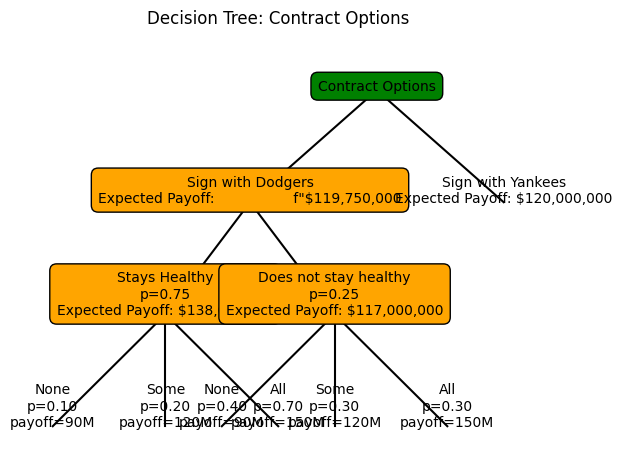

In [20]:
def plot_tree(root):
    def add_edges(node, pos={}, x=0, y=0, layer=1, dx=3.0):
        pos[node] = (x, y)
        neighbors = node.children
        if neighbors:
            next_y = y - 2
            next_layer = layer + 1
            for i, neighbor in enumerate(neighbors):
                next_x = x + dx * (i - (len(neighbors) - 1) / 2)
                pos = add_edges(neighbor, pos = pos,
                                x = next_x, y = next_y,
                                layer = next_layer,
                                dx = dx / 1.5)
                plt.plot([x, next_x], [y, next_y], 'k-')
        return pos

    pos = add_edges(root, dx=12.0)
    for node, (x, y) in pos.items():
        if node.is_leaf:
            plt.text(x, y, node.name, ha = 'center')
        else:
            if 'Contract Options' in node.name or 'Yankees' in node.name:
                plt.text(x, y, node.name,
                         ha = 'center',
                         bbox = dict(facecolor = 'green',
                                     edgecolor = 'black',
                                     boxstyle = 'round, pad = 0.5'))
            else:
                plt.text(x, y, node.name, ha='center',
                         bbox = dict(facecolor = 'orange',
                                     edgecolor = 'black',
                                     boxstyle = 'round,pad = 0.5'))

    plt.title('Decision Tree: Contract Options\n\n')
    plt.axis('off')
    plt.show()

plot_tree(root)        

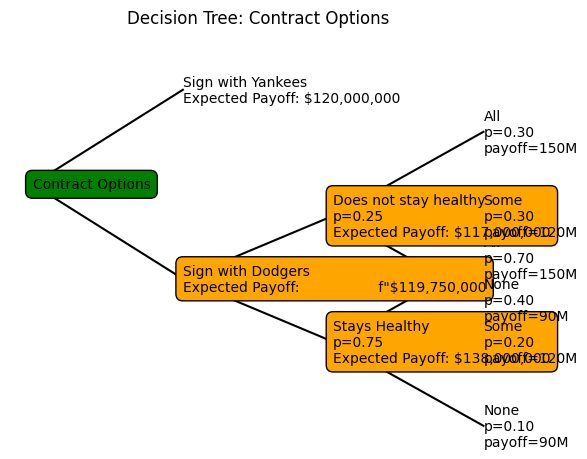

In [21]:
def plot_tree(root):
    def add_edges(node, pos = {}, x = 0, y = 0,
                  layer = 1, dy = 3.0):
        pos[node] = (x, y)
        neighbors = node.children
        if neighbors:
            next_x = x + 2  # Adjust horizontal spacing
            next_layer = layer + 1
            for i, neighbor in enumerate(neighbors):
                next_y = y + dy * (i - (len(neighbors) - 1) / 2)
                pos = add_edges(neighbor, pos = pos,
                                x = next_x, y = next_y,
                                layer = next_layer,
                                dy = dy / 1.5)
                plt.plot([x, next_x], [y, next_y], 'k-')
        return pos

    pos = add_edges(root, dy = 12.0)
    for node, (x, y) in pos.items():
        if node.is_leaf:
            plt.text(x, y, node.name, va = 'center')
        else:
            if ('Contract Options' in node.name
                    or 'Yankees' in node.name):
                plt.text(x, y, node.name,
                         va = 'center',
                         bbox = dict(facecolor = 'green',
                                   edgecolor = 'black',
                                   boxstyle = 'round, pad = 0.5'))
            else:
                plt.text(x, y, node.name, va = 'center',
                         bbox = dict(facecolor = 'orange',
                                   edgecolor = 'black',
                                   boxstyle = 'round,pad = 0.5'))

    plt.title('Decision Tree: Contract Options\n\n')
    plt.axis('off')
    plt.show()

# Plot the tree
plot_tree(root)